In [1]:
fci_BeH_p=-14.534949628234022
fci_HCl=-454.73878341646736

In [2]:
BeH_p_ryrz_result = []
BeH_p_ryrz_error_e1 = []
with open('BeH_p_ryrz_data.txt', 'r') as f:
    lines = f.readlines()
    i = 0
    while i < len(lines):
        if lines[i].strip() == '':
            i += 1
            continue
        steps = list(map(int, lines[i].strip().split('\t')[1:]))
        energies = list(map(float, lines[i+1].strip().split('\t')[1:]))
        errors = list(map(float, lines[i+2].strip().split('\t')[1:]))
        BeH_p_ryrz_result.append([steps, energies])
        BeH_p_ryrz_error_e1.append(errors)
        i += 4

# 读取 HCl_ryrz_result 和 HCl_ryrz_error_e1
HCl_ryrz_result = []
HCl_ryrz_error_e1 = []
with open('HCl_ryrz_data.txt', 'r') as f:
    lines = f.readlines()
    i = 0
    while i < len(lines):
        if lines[i].strip() == '':
            i += 1
            continue
        steps = list(map(int, lines[i].strip().split('\t')[1:]))
        energies = list(map(float, lines[i+1].strip().split('\t')[1:]))
        errors = list(map(float, lines[i+2].strip().split('\t')[1:]))
        HCl_ryrz_result.append([steps, energies])
        HCl_ryrz_error_e1.append(errors)
        i += 4

# 读取 BeH_p_Nblock_result 和 BeH_p_Nblock_error_e1
BeH_p_Nblock_result = []
BeH_p_Nblock_error_e1 = []
with open('BeH_p_Nblock_data.txt', 'r') as f:
    lines = f.readlines()
    i = 0
    while i < len(lines):
        if lines[i].strip() == '':
            i += 1
            continue
        steps = list(map(int, lines[i].strip().split('\t')[1:]))
        energies = list(map(float, lines[i+1].strip().split('\t')[1:]))
        errors = list(map(float, lines[i+2].strip().split('\t')[1:]))
        BeH_p_Nblock_result.append([steps, energies])
        BeH_p_Nblock_error_e1.append(errors)
        i += 4

# 读取 HCl_Nblock_result 和 HCl_Nblock_error_e1
HCl_Nblock_result = []
HCl_Nblock_error_e1 = []
with open('HCl_Nblock_data.txt', 'r') as f:
    lines = f.readlines()
    i = 0
    while i < len(lines):
        if lines[i].strip() == '':
            i += 1
            continue
        steps = list(map(int, lines[i].strip().split('\t')[1:]))
        energies = list(map(float, lines[i+1].strip().split('\t')[1:]))
        errors = list(map(float, lines[i+2].strip().split('\t')[1:]))
        HCl_Nblock_result.append([steps, energies])
        HCl_Nblock_error_e1.append(errors)
        i += 4

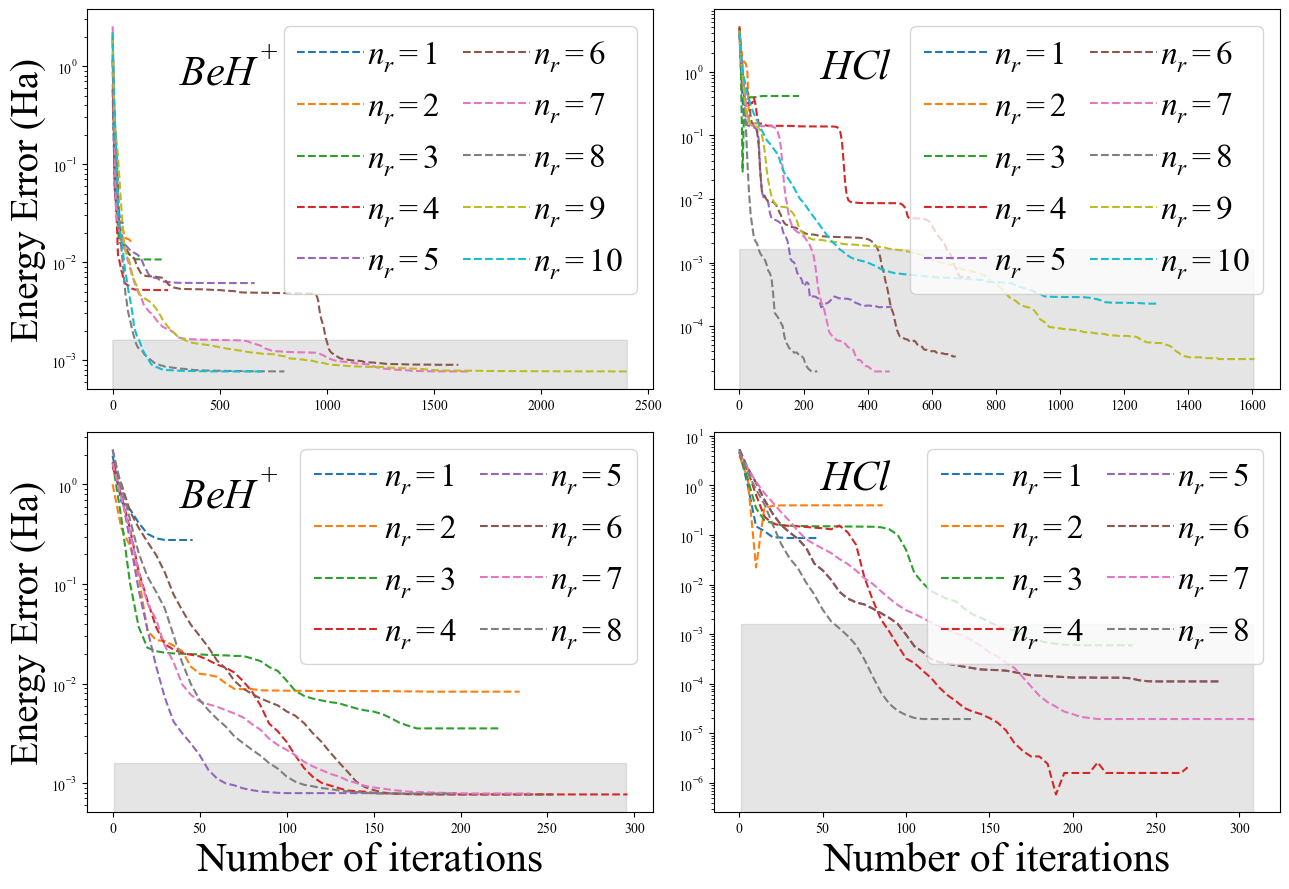

In [3]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import rcParams
import matplotlib.patches as mpatches


rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'Times New Roman'
rcParams['mathtext.it'] = 'Times New Roman:italic'
rcParams['mathtext.bf'] = 'Times New Roman:bold'

label_fontsize = 28
legend_fontsize = 24
text_fontsize = 30

def plot_error(ax, results, errors, repeats):
    for repeat in range(repeats):
        ax.plot(results[repeat][0], errors[repeat], label=rf'$n_{{r}}=${repeat+1}', linestyle='--')
    ax.fill_between(range(1, max(results[repeat][0][-1] for repeat in range(repeats))), 0, 0.0016, color='grey', alpha=0.2)
    ax.set_yscale('log')
    ax.legend(ncol=2, fontsize=legend_fontsize, handletextpad=0.1, columnspacing=0.7)

fig, axs = plt.subplots(2, 2, figsize=(13, 10))

# BeH+ RY-RZ
repeats=10
plot_error(axs[0, 0], BeH_p_ryrz_result, BeH_p_ryrz_error_e1, repeats)

# HCl RY-RZ
plot_error(axs[0, 1], HCl_ryrz_result, HCl_ryrz_error_e1, repeats)

# BeH+ N-block
repeats=8
plot_error(axs[1, 0], BeH_p_Nblock_result, BeH_p_Nblock_error_e1, repeats)

# HCl N-block
plot_error(axs[1, 1], HCl_Nblock_result, HCl_Nblock_error_e1, repeats)


handles, labels = axs[0, 0].get_legend_handles_labels()

chemical_precision_patch = mpatches.Patch(color='grey', alpha=0.2, label='Chemical precision')

axs[1, 0].set_xlabel('Number of iterations', fontsize=label_fontsize+2)
axs[1, 1].set_xlabel('Number of iterations', fontsize=label_fontsize+2)
axs[0, 0].set_ylabel('Energy Error (Ha)', fontsize=label_fontsize)
axs[1, 0].set_ylabel('Energy Error (Ha)', fontsize=label_fontsize)

axs[0, 0].text(0.25, 0.8, r'$BeH^+$', fontsize=text_fontsize, transform=axs[0, 0].transAxes, ha='center')
axs[0, 1].text(0.25, 0.82, r'$HCl$', fontsize=text_fontsize, transform=axs[0, 1].transAxes, ha='center')
axs[1, 0].text(0.25, 0.8, r'$BeH^+$', fontsize=text_fontsize, transform=axs[1, 0].transAxes, ha='center')
axs[1, 1].text(0.25, 0.85, r'$HCl$', fontsize=text_fontsize, transform=axs[1, 1].transAxes, ha='center')

plt.tight_layout(rect=[0, 0.05, 1, 0.95])  